### 1D Toy Model & Parameters Settings

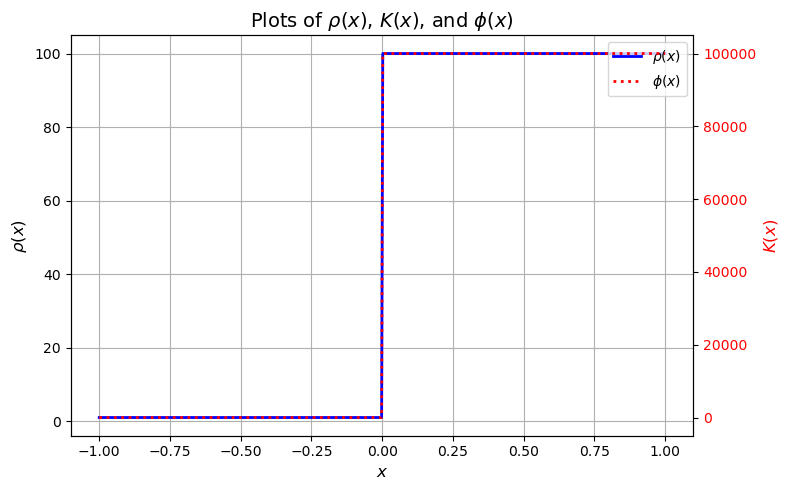

In [302]:
import numpy as np
import matplotlib.pyplot as plt
# Define phi(x) and K(x)
rho0 = 1.
rhos = 1e2
K0 = 1  # Background bulk modulus
Ks = 1e5
x = np.linspace(-1, 1, 500)
b = 0.  # Boundary starting point
kappa = 0.0001  # Sharpness of the transition

phi = np.tanh((x-b) / kappa)
K = K0 + (Ks - K0)*(1 + phi)*0.5
rho = rho0 + (rhos - rho0)*(1 + phi)*0.5

# Plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot rho(x) and K(x)
ax1.plot(x, rho, color='blue', label=r'$\rho(x)$', linewidth=2)
ax1.set_xlabel(r'$x$', fontsize=12)
ax1.set_ylabel(r'$\rho(x)$', fontsize=12)
ax1.tick_params(axis='y')
ax1.grid(True)

# Secondary y-axis for phi(x)
ax2 = ax1.twinx()
ax2.plot(x, K, color='red', linestyle=':', label=r'$\phi(x)$', linewidth=2)
ax2.set_ylabel(r'$K(x)$', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title(r'Plots of $\rho(x)$, $K(x)$, and $\phi(x)$', fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

$$\nabla\cdot\left(\frac{\nabla p\left(\bm{r},t\right)}{\rho_{0}\left(\bm{r}\right)}\right)+\frac{\omega^{2}}{K\left(\bm{r}\right)}p\left(\bm{r},t\right)=0$$
$$\frac{\partial}{\partial x}\left(\frac{1}{\rho_{0}\left(x\right)}\frac{\partial p\left(x,t\right)}{\partial x}\right)+\frac{\omega^{2}}{K\left(x\right)}p\left(x,t\right)=0$$

The system domain is $[-1,1]$, free boundary at both ending points and solid boundary at the center $x=0$.

### Sharp Boundary
$$\frac{\partial^{2}p}{\partial x^{2}}+\frac{\rho_{0}}{K}\omega^{2}p=0,\ \ i\omega\rho_{0}u=\frac{\partial p}{\partial x}$$
For domain $[a,c]$ with solid boundary starting at $x=b$,
$$\omega_{n}=\sqrt{\frac{K}{\rho_{0}}}\frac{\left(n+\frac{1}{2}\right)\pi}{b-a}$$

Set $a=-1,c=1$, we have theoretical eigenfrequency (same for both sub-domain)
$$\omega_{n}=\sqrt{\frac{K}{\rho_{0}}}\frac{1}{b+1}\left(n+\frac{1}{2}\right)\pi,\ \ \ n=0,1,2,...$$

the corresponding eigenfrequency and eigenfunction are (same for both sub-domain)
$$p=A\left(e^{ik_nx}+e^{i2k_nb}e^{-ik_nx}\right)e^{-i\omega_n t}\to A\left[\cos\left(k_nx-\omega t\right)+\cos\left(k_nx+\omega t-2k_nb\right)\right]$$
$$u=\frac{Ak_{n}}{\omega_{n}\rho_{0}}\left(e^{ik_{n}x}-e^{i2k_{n}b}e^{-ik_{n}x}\right)e^{-i\omega_{n}t}\to A\sqrt{\frac{1}{\rho_{0}K}}\left[\cos\left(k_{n}x-\omega_{n}t\right)-\cos\left(k_{n}x+\omega_{n}t-2k_{n}b\right)\right]$$

Eigenfrequency for n=0: 1.57 rad/s
Eigenfrequency for n=1: 4.71 rad/s
Eigenfrequency for n=2: 7.85 rad/s


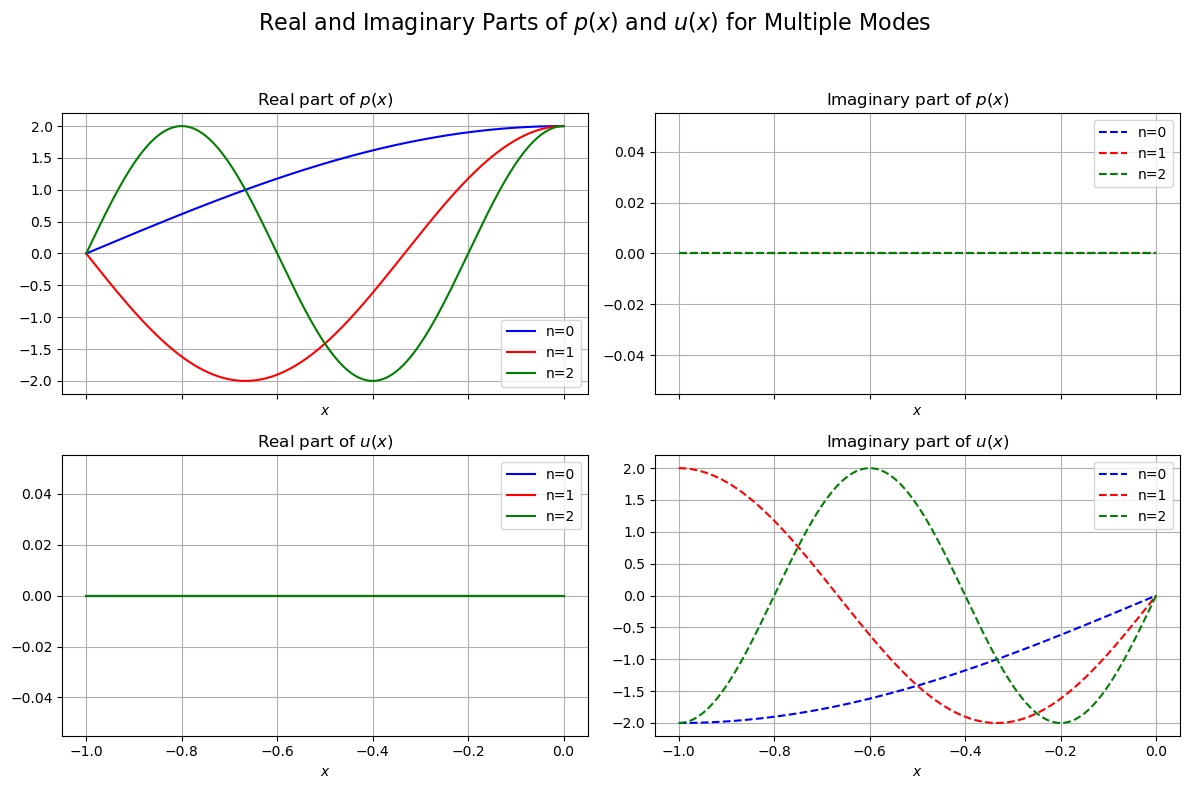

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.                  # Amplitude
rho0 = 1.               # Background density (e.g., air)
K = 1                   # Bulk modulus (Pa)
n_list = [0, 1, 2]      # Mode numbers
b = 0.                  # Boundary starting point

# Define x domain
x = np.linspace(-1, b, 500)

# Prepare figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# Colors for different modes
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Loop over mode numbers
for idx, n in enumerate(n_list):
    # Compute omega_n and k_n
    omega_n = np.sqrt(K / rho0) * (n + 0.5) * np.pi/(b + 1)
    k_n = np.sqrt(rho0 / K) * omega_n
    print(f"Eigenfrequency for n={n}: {omega_n:.2f} rad/s")

    # Compute p(x) and u(x)
    p = A * (np.exp(1j * k_n * x) + np.exp(-1j * k_n * x + 2 * k_n * b))
    u = (A * k_n / (omega_n * rho0)) * (np.exp(1j * k_n * x) - np.exp(-1j * k_n * x + 2 * k_n * b))

    # Plot real and imaginary parts
    axes[0, 0].plot(x, p.real, color=colors[idx % len(colors)], label=f'n={n}')
    axes[0, 1].plot(x, p.imag, color=colors[idx % len(colors)], linestyle='--', label=f'n={n}')
    axes[1, 0].plot(x, u.real, color=colors[idx % len(colors)], label=f'n={n}')
    axes[1, 1].plot(x, u.imag, color=colors[idx % len(colors)], linestyle='--', label=f'n={n}')

# Titles
axes[0, 0].set_title('Real part of $p(x)$')
axes[0, 1].set_title('Imaginary part of $p(x)$')
axes[1, 0].set_title('Real part of $u(x)$')
axes[1, 1].set_title('Imaginary part of $u(x)$')

# Axis labels, grid, and legends
for ax in axes.flat:
    ax.set_xlabel('$x$')
    #ax.set_ylabel('Amplitude')
    ax.grid(True)
    ax.legend()

plt.suptitle('Real and Imaginary Parts of $p(x)$ and $u(x)$ for Multiple Modes', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



### Diffusive Boundary

$$\frac{\partial}{\partial x}\left(\frac{1}{\rho_{0}\left(x\right)}\frac{\partial p\left(x,t\right)}{\partial x}\right)+\frac{\omega^{2}}{K\left(x\right)}p\left(x,t\right)=0$$

$$\rho\left(x\right)=\left(1-\phi\right)\rho_{0}+\phi\rho_{s},\ \ K\left(x\right)=\left(1-\phi\right)K_{0}+\phi K_{s},\ \ \phi\left(x\right)=e^{-\frac{x^{2}}{0.01}}$$

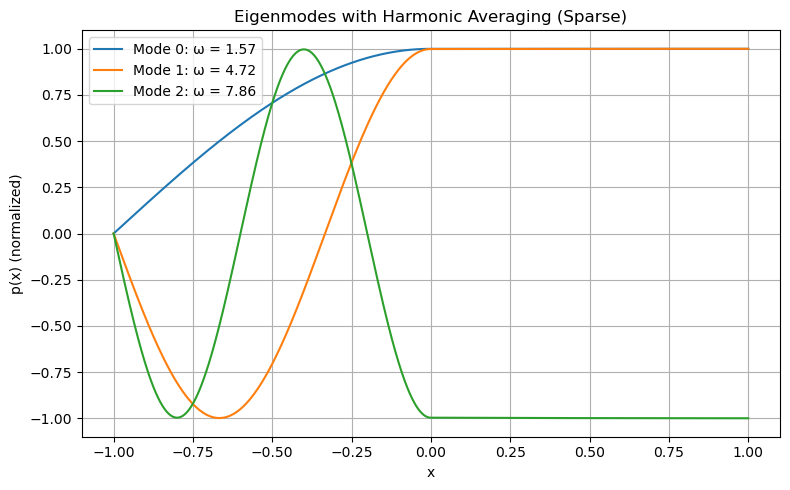

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh  # sparse eigenvalue solver

# Parameters
L = 1.0
N = 20000
x = np.linspace(-L, L, N)
dx = x[1] - x[0]
b = 0.
kappa = 0.0001  # Sharpness of the transition
# Material parameters
rho0 = 1.
rhos = 1e3
K0 = 1  # Background bulk modulus
Ks = 1e7
phi = np.tanh((x-b) / kappa)
K = K0 + (Ks - K0)*(1 + phi)*0.5
rho = rho0 + (rhos - rho0)*(1 + phi)*0.5

inv_rho = 1.0 / rho
inv_K = 1.0 / K

# Harmonic average of 1/rho at cell interfaces i+1/2
inv_rho_half = 2 / (1/inv_rho[:-1] + 1/inv_rho[1:])  # N-1 elements

'''
# Neumann BCs on both ends
# Diagonals for sparse matrix
main_diag = np.zeros(N-2)
upper_diag = np.zeros(N-3)
lower_diag = np.zeros(N-3)
# Interior points
# main_diag[1:-1] selects elements from index 1 (value 1) up to, but not including, the last element
main_diag = -(inv_rho_half[1:] + inv_rho_half[:-1]) / dx**2 # N-2 elements
# p[1] = p[0] and p[-2] = p[-1] for Neumann BCs
main_diag[0] = -inv_rho_half[0] / dx**2  # Left Neumann, p[0] = p[1]
main_diag[-1] = -inv_rho_half[-1] / dx**2  # Right Neumann, p[N-1] = p[N-2]
upper_diag[:] = inv_rho_half[1:-1] / dx**2 # N-3 elements
lower_diag[:] = inv_rho_half[1:-1] / dx**2 # N-3 elements
################### .....................
# Add boundaries after eigenfunctions are computed
######  full_modes = np.zeros((N, num_modes))
######  full_modes[1:-1, :] = modes_sorted
######  full_modes[0, :] = modes_sorted[0, :]
######  full_modes[-1, :] = modes_sorted[-1, :]
'''

'''
# Dirichlet BCs on both ends
# p[0] = p[-1] = 0 for Dirichlet BCs
main_diag = np.zeros(N-2)
upper_diag = np.zeros(N-3)
lower_diag = np.zeros(N-3)
main_diag = -(inv_rho_half[1:] + inv_rho_half[:-1]) / dx**2 # N-2 elements
# compared with Neumann BCs, we do not modify main_diag[0] and main_diag[-1] elements!
upper_diag = inv_rho_half[1:-1] / dx**2
lower_diag = inv_rho_half[1:-1] / dx**2
################### .....................
# Add boundaries after eigenfunctions are computed
######  full_modes = np.zeros((N, num_modes))
######  full_modes[1:-1, :] = modes_sorted
'''

# Left Dirichlet BCs and right Neumann BCs
# Main diagonal
main_diag = np.zeros(N-2)
main_diag = -(inv_rho_half[1:] + inv_rho_half[:-1]) / dx**2
upper_diag = inv_rho_half[1:-1] / dx**2  # size N-3
lower_diag = inv_rho_half[1:-1] / dx**2  # size N-3
# p[0] = 0 for left Dirichlet BCs
# p[N-2] = p[N-1] for right Neumann BCs
main_diag[-1] = -inv_rho_half[-1] / dx**2   # Right Neumann, p[N-1] = p[N-2]

# Assemble sparse stiffness matrix M
M = diags(
    diagonals=[main_diag, upper_diag, lower_diag],
    offsets=[0, 1, -1],
    format='csr'
)

# Assemble sparse mass matrix S
S = diags(inv_K[1:-1], 0, format='csr')

# Solve generalized eigenvalue problem -M p = omega^2 S p
num_modes = 10  # number of eigenmodes to compute
eigvals, eigvecs = eigsh(
    -M, k=num_modes, M=S, sigma=5, which='LM'  # find smallest eigenvalues near sigma=1
)

# Eigenfrequencies
omega = np.sqrt(np.abs(eigvals))
# Sort eigenvalues and eigenvectors
idx_sort = np.argsort(omega)
omega = omega[idx_sort]
modes_sorted = eigvecs[:, idx_sort]

# Add boundaries
full_modes = np.zeros((N, num_modes))
full_modes[1:-1, :] = modes_sorted
full_modes[-1, :] = modes_sorted[-1, :]
# Normalize eigenmodes
for i in range(num_modes):
    full_modes[:, i] /= np.max(np.abs(full_modes[:, i]))

# Plot first few eigenmodes
modes_selected = [0,1,2]
plt.figure(figsize=(8, 5))
for i in modes_selected:
    plt.plot(x, full_modes[:, i], label=f'Mode {i}: ω = {omega[i]:.2f}')
plt.xlabel('x')
plt.ylabel('p(x) (normalized)')
plt.title('Eigenmodes with Harmonic Averaging (Sparse)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Time Evolution of Cahn Hilliard Equation

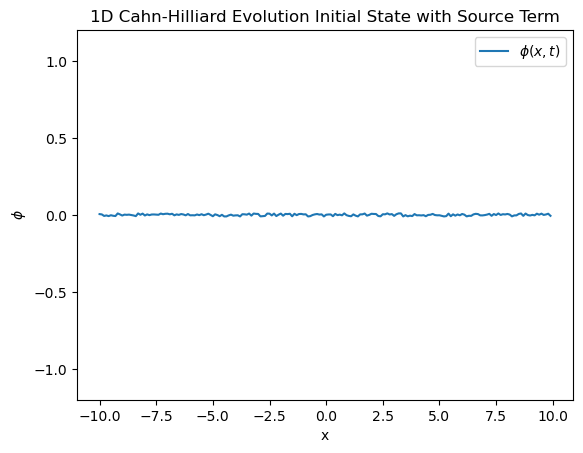

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
L = 10
N = 200
dx = 2.*L / N
x = np.linspace(-L, L, N, endpoint=False)

dt = 1e-4
steps = int(1e7)
frames = 5000
steps_per_frame = steps // frames

M = 1.0
gamma = 0.01
lambda_decay = 2.

phi = 0.01 * (2 * np.random.rand(N) - 1)

def source(t):
    return np.exp(-lambda_decay * t) * np.random.rand(N)


def laplacian(f):
    lap = np.empty_like(f)
    lap[1:-1] = f[2:] - 2*f[1:-1] + f[:-2]
    lap[0] = f[1] - 2*f[0] + f[-1]
    lap[-1] = f[0] - 2*f[-1] + f[-2]
    return lap / dx**2

fig, ax = plt.subplots()
line, = ax.plot(x, phi, label=r"$\phi(x,t)$")
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("x")
ax.set_ylabel(r"$\phi$")
ax.set_title("1D Cahn-Hilliard Evolution Initial State with Source Term")
ax.legend()
plt.show()

def update(frame):
    global phi
    t = frame * steps_per_frame * dt
    for _ in range(steps_per_frame):
        mu = -gamma * laplacian(phi) + (phi**3 - phi)
        S = source(t)
        phi += dt * (M * laplacian(mu) + S) 
        t += dt
    line.set_ydata(phi)
    ax.set_title(f"1D Cahn-Hilliard (step {frame*steps_per_frame})")
    return line,

# SAVE phi !!!
np.save('phi_initial_test.npy', phi)

ani = animation.FuncAnimation(fig, update, frames=frames, interval=20, blit=True)
ani.save('cahn_hilliard1D_1.mp4', writer='ffmpeg', fps=30)



In [180]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
Lx, Ly = 10.0, 10.0
Nx, Ny = 128, 128
dx, dy = Lx / Nx, Ly / Ny
x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y, indexing='ij')

dt = 1e-4
steps = 20000        # total simulation steps
frames = 200         # number of animation frames
steps_per_frame = steps // frames

# Cahn-Hilliard parameters
M = 1.0
gamma = 0.01
lambda_decay = 0.1

# Initial condition: small random noise
phi = 0.01 * (2 * np.random.rand(Nx, Ny) - 1)

def source(t):
    return np.exp(-lambda_decay * t) * np.sin(1.5 * np.pi * X)

def laplacian(f):
    f_xx = (np.roll(f, -1, axis=0) - 2 * f + np.roll(f, 1, axis=0)) / dx**2
    f_yy = (np.roll(f, -1, axis=1) - 2 * f + np.roll(f, 1, axis=1)) / dy**2
    return f_xx + f_yy

# Set up figure and axis
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(phi.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='RdBu', vmin=-1, vmax=1)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$\phi(x,y)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Cahn-Hilliard evolution with source term")

def update(frame):
    global phi
    t = frame * steps_per_frame * dt
    for _ in range(steps_per_frame):
        mu = -gamma * laplacian(phi) + (phi**3 - phi)
        S = source(t)
        phi += dt * (M * laplacian(mu) + S)
        t += dt
    im.set_array(phi.T)
    ax.set_title(f"Cahn-Hilliard evolution (step {frame*steps_per_frame})")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=frames, blit=True, interval=100)
ani.save('cahn_hilliard.mp4', writer='ffmpeg', fps=30)
